<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

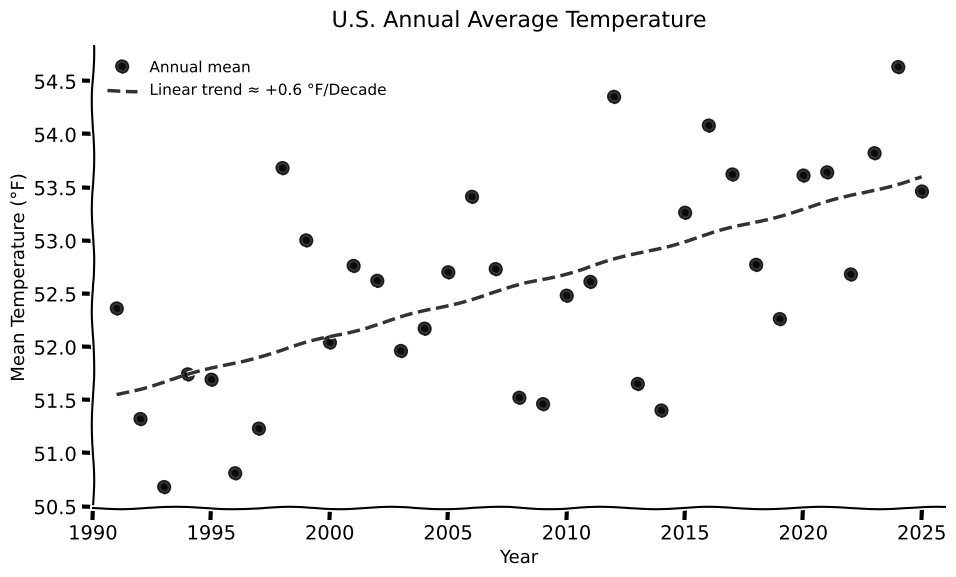

Linear Regression Statistics
══════════════════════════════
Number of data points:     35
Time span:                 1991 – 2025  (35 years)
Slope:                     0.0602 °F/year   →  0.602 °F/decade
Intercept:                 -68.32 °F
R² (coefficient of determination): 0.369
  → Explained variance:    36.9%
  → Unexplained variance:  63.1%
p-value for slope:         0.00011
Significance:              highly significant (p < 0.01)
Standard error of slope:   0.01372
Total fitted change over period: 2.05 °F

Interpretation: R² = 0.369 means the linear trend is moderate at best — a linear trend explains only part of the behavior.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy import stats


filename = 'data.csv'
df = pd.read_csv(filename)
df.columns = df.columns.str.strip()

yearly_avg = (
    df.groupby('Year', as_index=False)['Temperature']
      .mean()
      .rename(columns={'Temperature': 'Mean_Temperature'})
)
yearly_avg['Mean_Temperature'] = yearly_avg['Mean_Temperature'].round(2)

years = yearly_avg['Year']
temps = yearly_avg['Mean_Temperature']

slope, intercept = np.polyfit(years, temps, 1)
trend_line = slope * years + intercept
trend_label = f'Linear trend ≈ {10*slope:+.1f} °F/Decade'

# --- XKCD STYLE For fun ---
with plt.xkcd(scale=1.2, length=120, randomness=2):
    fig, ax = plt.subplots(figsize=(11, 6), dpi=100)

    ax.plot(years, temps, 'o', markersize=9, color='black', alpha=0.8, label='Annual mean')
    ax.plot(years, trend_line, '--', lw=2.5, color='black', alpha=0.8, label=trend_label)

    ax.set_title('U.S. Annual Average Temperature', fontsize=16, pad=14)
    ax.set_xlabel('Year', fontsize=13)
    ax.set_ylabel('Mean Temperature (°F)', fontsize=13)
    ax.set_xlim(1990, 2026)
    ax.set_xticks(range(1990, 2026 + 1, 5))  # every 5 years
    ax.legend(loc='upper left', fontsize=11, frameon=False)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()

import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)



x = np.array(years)         
y = np.array(temps)          

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Key metrics
r_squared     = r_value ** 2
slope_decade  = slope * 10                     
total_change  = slope * (x.max() - x.min())     

# printing summary - conclusion 
print("Linear Regression Statistics")
print("══════════════════════════════")
print(f"Number of data points:     {len(x)}")
print(f"Time span:                 {int(x.min())} – {int(x.max())}  ({x.max()-x.min()+1} years)")
print(f"Slope:                     {slope:.4f} °F/year   →  {slope_decade:.3f} °F/decade")
print(f"Intercept:                 {intercept:.2f} °F")
print(f"R² (coefficient of determination): {r_squared:.3f}")
print(f"  → Explained variance:    {r_squared*100:.1f}%")
print(f"  → Unexplained variance:  {(1 - r_squared)*100:.1f}%")
print(f"p-value for slope:         {p_value:.5f}")
if p_value < 0.01:
    sig = "highly significant (p < 0.01)"
elif p_value < 0.05:
    sig = "statistically significant (p < 0.05)"
elif p_value < 0.10:
    sig = "marginally significant (p < 0.10)"
else:
    sig = "not statistically significant (p ≥ 0.05)"
print(f"Significance:              {sig}")
print(f"Standard error of slope:   {std_err:.5f}")
print(f"Total fitted change over period: {total_change:.2f} °F")

if r_squared < 0.25:
    interp = "very weak — most of the year-to-year variation is not captured by a linear trend."
elif r_squared < 0.50:
    interp = "moderate at best — a linear trend explains only part of the behavior."
else:
    interp = "reasonably strong for annual climate data — the linear trend captures a substantial fraction of the variation."
print(f"\nInterpretation: R² = {r_squared:.3f} means the linear trend is {interp}")



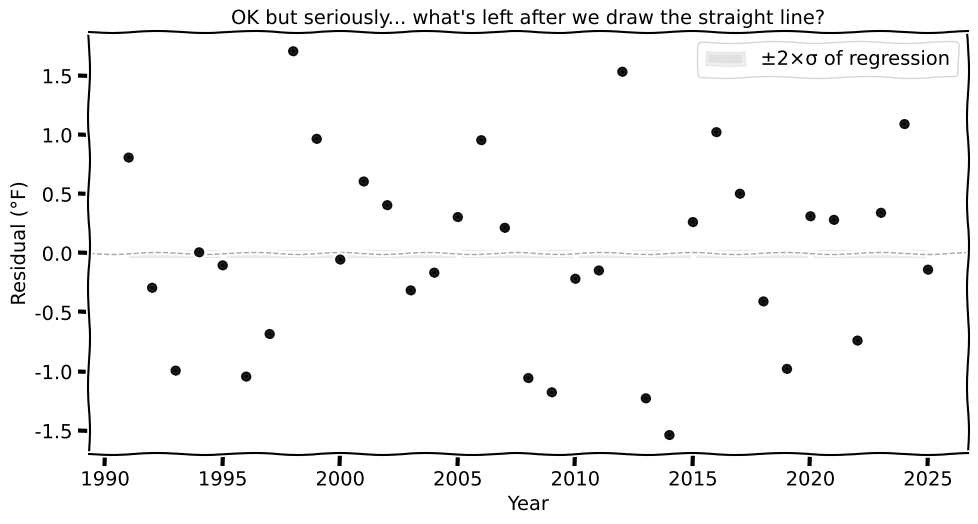

Residual standard deviation = 0.796 °F
Compare to trend slope:     0.602 °F/decade  →  yearly trend = 0.0602 °F/yr
The residual variability is larger than the yearly trend. Therefore the trend may be obscured by noise and is not clearly meaningful.


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Tell matplotlib we're going xkcd style
plt.xkcd()   # ← this is the main magic

# Assuming you already have:
# slope, intercept, ..., = stats.linregress(years, temps)
fitted = intercept + slope * years
residuals = temps - fitted

plt.figure(figsize=(10, 5.5))
plt.axhline(0, color='gray', linestyle='--', lw=1, alpha=0.7)
plt.plot(years, residuals, 'o', color='black', markersize=6, lw=0.8, alpha=0.9)
plt.fill_between(years, -std_err*2, +std_err*2, color='gray', alpha=0.12, label='±2×σ of regression')

plt.title("Residuals (Noise) After Removing Linear Trend")
plt.xlabel("Year")
plt.ylabel("Residual (°F)")

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# Optional: make title a bit more xkcd-ish
plt.title("OK but seriously... what's left after we draw the straight line?", fontsize=14)

plt.show()

print(f"Residual standard deviation = {np.std(residuals):.3f} °F")
print(f"Compare to trend slope:     {slope*10:.3f} °F/decade  →  yearly trend = {slope:.4f} °F/yr")
if np.std(residuals) > abs(slope):
    print("The residual variability is larger than the yearly trend. Therefore the trend may be obscured by noise and is not clearly meaningful.")
else:
    print("The yearly trend is larger than the residual variability. Therefore the trend is meaningful compared to the noise.")

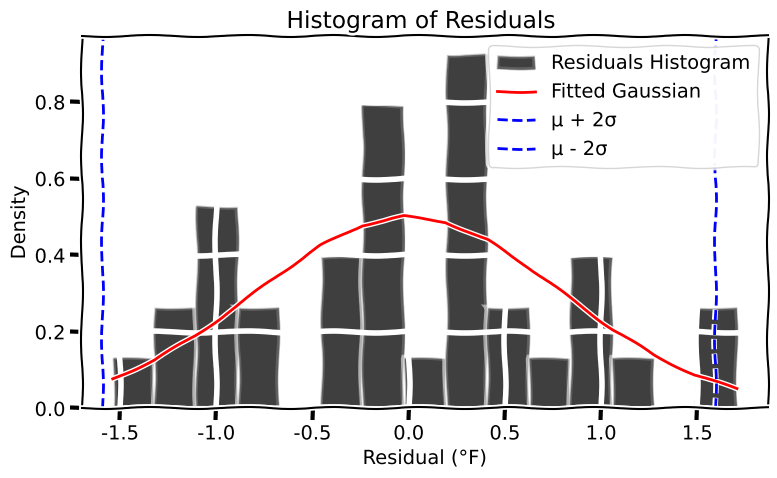

Standard deviation of residuals (σ) = 0.796 °F


In [11]:
from scipy.stats import norm, linregress
mu, sigma = norm.fit(residuals)
#  add the sigma to the histogram plot as vertical lines
with plt.xkcd():
    plt.figure(figsize=(8, 5))
    count, bins, ignored = plt.hist(residuals, bins=15, density=True, color='black', alpha=0.5, edgecolor='white', label='Residuals Histogram')
    plt.plot(bins, norm.pdf(bins, mu, sigma), 'r-', linewidth=2, label='Fitted Gaussian')
    plt.axvline(mu + 2*sigma, color='blue', linestyle='--', label='μ + 2σ')
    plt.axvline(mu - 2*sigma, color='blue', linestyle='--', label='μ - 2σ')
    plt.title("Histogram of Residuals ")
    plt.xlabel("Residual (°F)")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    print(f"Standard deviation of residuals (σ) = {sigma:.3f} °F")


In [27]:
print("Slope with uncertainty?")
print(f" {slope:.1f} °F/year ± {sigma:.1f} °F/year")

Slope with uncertainty?
 0.1 °F/year ± 0.8 °F/year
